In [74]:
import pandas as pd
import os
import requests
import numpy as np

import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

from datetime import date
from datetime import timedelta
from pathlib import Path
from mc_simulation import MonteCarloSimulation as mcs

%matplotlib inline

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = "PKVCMHBCTA6RV3U9QLAF"
alpaca_secret_key = "YUBAXi2swtxAnd3XCD0iPlwOePNe6vFuxckuP2kn"

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [66]:
# Setting-up the dataframe
my_df = Path('../Resources/portfolio_eli.csv')
portfolio = pd.read_csv(my_df, index_col='Stock')
portfolio['Weight'] = portfolio['Weight'].str.replace('%','').astype('float')
portfolio.head()

# Adding the data into lists
stock_tickers = portfolio['Ticker'].tolist()
stock_weights = portfolio['Weight'].tolist()

In [119]:
# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2022,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f'There are {len(stock_tickers)} individual stocks in your portfolio')

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

2023-02-13
There are 6 individual stocks in your portfolio


In [112]:
# Get current closing prices for stocksymbols
stocks_df = alpaca.get_bars(
    stock_tickers,
    timeframe,
    start = startdate,
    end = end_date
).df

stock_df_list = []
columns = ["symbol", "open", "high", "low", "volume", "trade_count", "vwap"]

tickers = stock_tickers

def create_stock_df_list():    
    for ticker in tickers:        
        stock_df = stocks_df[stocks_df["symbol"]==ticker].drop(columns, axis=1)
        stock_df_list.append(stock_df)
    return stock_df_list

# calling create stock df list function
create_stock_df_list()

stock_df = pd.concat(stock_df_list, axis=1, keys=stock_tickers)
stock_df

,VOT,VUG,AAPL,ATVI,VOOG,MFA
,close,close,close,close,close,close
timestamp,,,,,,
2022-01-03 05:00:00+00:00,251.37,323.09,182.010,67.42,304.02,4.59
2022-01-04 05:00:00+00:00,247.81,319.19,179.700,67.20,301.09,4.62
2022-01-05 05:00:00+00:00,238.40,308.23,174.835,66.30,291.91,4.55
2022-01-06 05:00:00+00:00,238.92,307.56,172.000,63.82,291.16,4.57
2022-01-07 05:00:00+00:00,235.34,304.21,172.170,64.04,288.37,4.62
...,...,...,...,...,...,...
2023-02-07 05:00:00+00:00,201.31,245.58,154.650,75.60,228.85,11.77
2023-02-08 05:00:00+00:00,199.22,241.98,151.920,72.89,226.09,11.64


In [123]:
stock_df_list = []
columns = ["symbol", "open", "high", "low", "volume", "trade_count", "vwap"]

tickers = stock_tickers

def create_stock_df_list():    
    for ticker in tickers:        
        stock_df = stocks_df[stocks_df["symbol"]==ticker].drop(columns, axis=1)
        stock_df_list.append(stock_df)
    return stock_df_list

# calling create stock df list function
create_stock_df_list()

stock_df = pd.concat(stock_df_list, axis=1, keys=stock_tickers)
stock_df

,VOT,VUG,AAPL,ATVI,VOOG,MFA
,close,close,close,close,close,close
timestamp,,,,,,
2022-01-03 05:00:00+00:00,251.37,323.09,182.010,67.42,304.02,4.59
2022-01-04 05:00:00+00:00,247.81,319.19,179.700,67.20,301.09,4.62
2022-01-05 05:00:00+00:00,238.40,308.23,174.835,66.30,291.91,4.55
2022-01-06 05:00:00+00:00,238.92,307.56,172.000,63.82,291.16,4.57
2022-01-07 05:00:00+00:00,235.34,304.21,172.170,64.04,288.37,4.62
...,...,...,...,...,...,...
2023-02-07 05:00:00+00:00,201.31,245.58,154.650,75.60,228.85,11.77
2023-02-08 05:00:00+00:00,199.22,241.98,151.920,72.89,226.09,11.64


In [ ]:
# Visualizing the portfolio weights
portfolio.plot.pie(y='Weight', title='', figsize=(8,10), legend=None)

In [126]:
stock_daily_returns = stock_df.pct_change()
stock_daily_returns = stock_daily_returns.dropna()
portfolio_returns = stock_daily_returns.dot(stock_weights)
portfolio_returns

timestamp
2022-01-04 05:00:00+00:00   -1.019264
2022-01-05 05:00:00+00:00   -3.072310
2022-01-06 05:00:00+00:00   -0.375114
2022-01-07 05:00:00+00:00   -0.826600
2022-01-10 05:00:00+00:00   -0.038235
                               ...   
2023-02-07 05:00:00+00:00    1.750298
2023-02-08 05:00:00+00:00   -1.309512
2023-02-09 05:00:00+00:00   -0.817289
2023-02-10 05:00:00+00:00    0.036469
2023-02-13 05:00:00+00:00    1.182990
Length: 279, dtype: float64

In [124]:
sap_ticker = "IVV"

sap_df = alpaca.get_bars(
    sap_ticker,
    timeframe,
    start = startdate,
    end = end_date
).df

sap_columns = ["open", "high", "low", "volume", "trade_count", "vwap"]

sap_df = sap_df.drop(sap_columns, axis=1)
sap_df

,close
timestamp,
2022-01-03 05:00:00+00:00,479.84
2022-01-04 05:00:00+00:00,479.68
2022-01-05 05:00:00+00:00,470.33
2022-01-06 05:00:00+00:00,469.98
2022-01-07 05:00:00+00:00,468.10
...,...
2023-02-07 05:00:00+00:00,417.12
2023-02-08 05:00:00+00:00,412.57
2023-02-09 05:00:00+00:00,409.07


<Axes: xlabel='timestamp'>

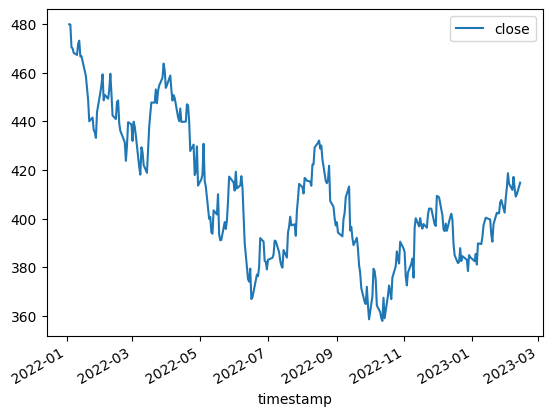

In [108]:
sap_df.plot()

In [132]:
sap_daily_returns = sap_df.pct_change()
sap_daily_returns.dropna(inplace=True)
sap_daily_returns.rename(columns= {'close':'S&P 500 Daily Returns'}, inplace=True)
sap_daily_returns

,S&P 500 Daily Returns
timestamp,
2022-01-04 05:00:00+00:00,-0.000333
2022-01-05 05:00:00+00:00,-0.019492
2022-01-06 05:00:00+00:00,-0.000744
2022-01-07 05:00:00+00:00,-0.004000
2022-01-10 05:00:00+00:00,-0.001880
...,...
2023-02-07 05:00:00+00:00,0.012919
2023-02-08 05:00:00+00:00,-0.010908
2023-02-09 05:00:00+00:00,-0.008483


<Axes: xlabel='timestamp'>

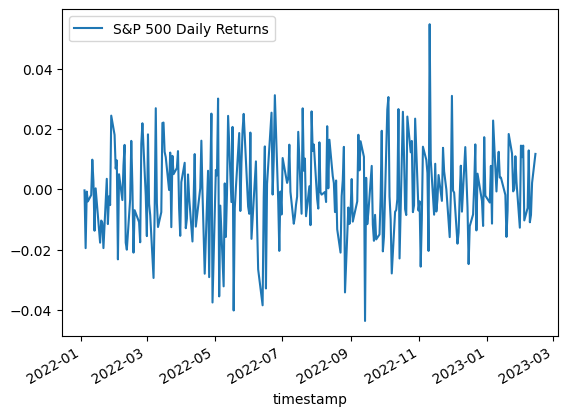

In [159]:
sap_daily_returns.plot()

In [145]:
# Pull in Omar's Data
omar_df = Path('../Resources/portfolio_omar.csv')
omar_portfolio = pd.read_csv(omar_df, index_col='Stock')
omar_portfolio['Weight'] = omar_portfolio['Weight'].str.replace('%','').astype('float')

# Adding the data into lists
omar_stock_tickers = omar_portfolio['Ticker'].tolist()
omar_stock_weights = omar_portfolio['Weight'].tolist()

# Get current closing prices for stocksymbols
omars_df = alpaca.get_bars(
    omar_stock_tickers,
    timeframe,
    start = startdate,
    end = end_date
).df

omar_stock_df_list = []
columns = ["symbol", "open", "high", "low", "volume", "trade_count", "vwap"]

omar_tickers = omar_stock_tickers

def create_omar_df_list():    
    for ticker in omar_tickers:        
        omar_df = omars_df[omars_df["symbol"]==ticker].drop(columns, axis=1)
        omar_stock_df_list.append(omar_df)
    return omar_stock_df_list

# Calling create stock df list function
create_omar_df_list()

omar_stock_df = pd.concat(omar_stock_df_list, axis=1, keys=omar_stock_tickers)

omar_stock_daily_returns = omar_stock_df.pct_change()
omar_stock_daily_returns = omar_stock_daily_returns.dropna()
omar_portfolio_returns = omar_stock_daily_returns.dot(omar_stock_weights)
omar_portfolio_returns

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,JNJ,JPM,WMT,...,CAT,SBUX,INTU,CVS,TJX,TGT,ABNB,BSX,MRNA,PNC
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-04 05:00:00+00:00,-0.012692,-0.017147,-0.004083,-0.016916,-0.041833,-0.027589,-0.005937,-0.002682,0.037910,-0.018320,...,0.053527,-0.020912,-0.020824,0.001248,0.015486,0.009571,-0.010887,0.012059,-0.008466,0.036836
2022-01-05 05:00:00+00:00,-0.027073,-0.038388,-0.045999,-0.018636,-0.053471,-0.057733,-0.036847,0.006664,-0.024132,0.013521,...,0.007658,-0.033263,-0.039818,0.014575,-0.020594,-0.022676,-0.050059,-0.013520,-0.076118,-0.016212
2022-01-06 05:00:00+00:00,-0.016215,-0.007902,-0.000071,-0.006971,-0.021523,0.020979,0.025700,-0.003426,0.010624,-0.002779,...,0.010193,0.006338,-0.012313,-0.030432,0.004392,0.010880,-0.015408,-0.010685,0.003437,0.038514
2022-01-07 05:00:00+00:00,0.000988,0.000510,-0.005303,-0.004288,-0.035447,-0.033040,-0.002015,0.013517,0.009908,0.009546,...,0.009910,-0.032122,-0.032112,0.015596,-0.014443,-0.002464,0.039437,-0.011270,-0.010182,0.014327
2022-01-10 05:00:00+00:00,0.000116,0.000732,0.012061,-0.006570,0.030342,0.005615,-0.011212,-0.004944,0.000957,-0.001933,...,-0.011374,-0.014316,0.004634,0.008350,-0.025410,-0.014559,-0.032159,0.007124,0.092771,-0.005721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07 05:00:00+00:00,0.019245,0.042022,0.046064,-0.000685,0.010526,0.051401,0.029883,0.000245,0.012190,0.002132,...,-0.007000,0.017187,0.030555,0.008563,-0.003618,0.005292,0.011322,0.009022,0.004640,-0.000368
2023-02-08 05:00:00+00:00,-0.017653,-0.003102,-0.076830,-0.020174,0.022763,0.001443,-0.042741,0.001285,-0.007031,-0.005391,...,-0.003164,-0.004915,-0.013866,0.034659,0.005635,-0.016995,-0.027822,-0.010397,-0.039284,-0.008469


In [160]:
eamonn_df = Path('../Resources/portfolio_eamonn.csv')
eamonn_portfolio = pd.read_csv(eamonn_df, index_col='Stock')
eamonn_portfolio['PortFolio Weight'] = eamonn_portfolio['PortFolio Weight'].str.replace('%','').astype('float')

# Adding the data into lists
eamonn_stock_tickers = eamonn_portfolio['Ticker'].tolist()
eamonn_stock_weights = eamonn_portfolio['PortFolio Weight'].tolist()

# Get current closing prices for stocksymbols
eamonns_df = alpaca.get_bars(
    eamonn_stock_tickers,
    timeframe,
    start = startdate,
    end = end_date
).df

eamonn_stock_df_list = []
columns = ["symbol", "open", "high", "low", "volume", "trade_count", "vwap"]

eamonn_tickers = eamonn_stock_tickers

def create_eamonn_df_list():    
    for ticker in eamonn_tickers:        
        eamonn_df = eamonns_df[eamonns_df["symbol"]==ticker].drop(columns, axis=1)
        eamonn_stock_df_list.append(eamonn_df)
    return eamonn_stock_df_list

# calling create stock df list function
create_eamonn_df_list()

eamonn_stock_df = pd.concat(eamonn_stock_df_list, axis=1, keys=eamonn_stock_tickers)


eamonn_stock_daily_returns = eamonn_stock_df.pct_change()
eamonn_stock_daily_returns = eamonn_stock_daily_returns.dropna()
eamonn_portfolio_returns = eamonn_stock_daily_returns.dot(eamonn_stock_weights)
eamonn_portfolio_returns

timestamp
2022-01-04 05:00:00+00:00    1.026278
2022-01-05 05:00:00+00:00   -0.493349
2022-01-06 05:00:00+00:00    0.046685
2022-01-07 05:00:00+00:00    0.399124
2022-01-10 05:00:00+00:00   -0.259370
                               ...   
2023-02-07 05:00:00+00:00    0.260475
2023-02-08 05:00:00+00:00   -0.562464
2023-02-09 05:00:00+00:00   -1.328244
2023-02-10 05:00:00+00:00    0.552428
2023-02-13 05:00:00+00:00    0.951870
Length: 279, dtype: float64

In [157]:
combined_df = pd.concat([portfolio_returns, omar_portfolio_returns, eamonn_portfolio_returns, sap_daily_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'My Portfolio Returns',1:'Omars Returns',2:'Eamonns Returns'}, inplace=True)
combined_df

,My Portfolio Returns,Omars Returns,Eamonns Returns,S&P 500 Daily Returns
timestamp,,,,
2022-01-04 05:00:00+00:00,-1.019264,-0.430550,1.026278,-0.000333
2022-01-05 05:00:00+00:00,-3.072310,-2.292852,-0.493349,-0.019492
2022-01-06 05:00:00+00:00,-0.375114,-0.251813,0.046685,-0.000744
2022-01-07 05:00:00+00:00,-0.826600,-0.503808,0.399124,-0.004000
2022-01-10 05:00:00+00:00,-0.038235,-0.421430,-0.259370,-0.001880
...,...,...,...,...
2023-02-07 05:00:00+00:00,1.750298,1.240092,0.260475,0.012919
2023-02-08 05:00:00+00:00,-1.309512,-1.230054,-0.562464,-0.010908
2023-02-09 05:00:00+00:00,-0.817289,-0.894948,-1.328244,-0.008483


<Axes: xlabel='timestamp'>

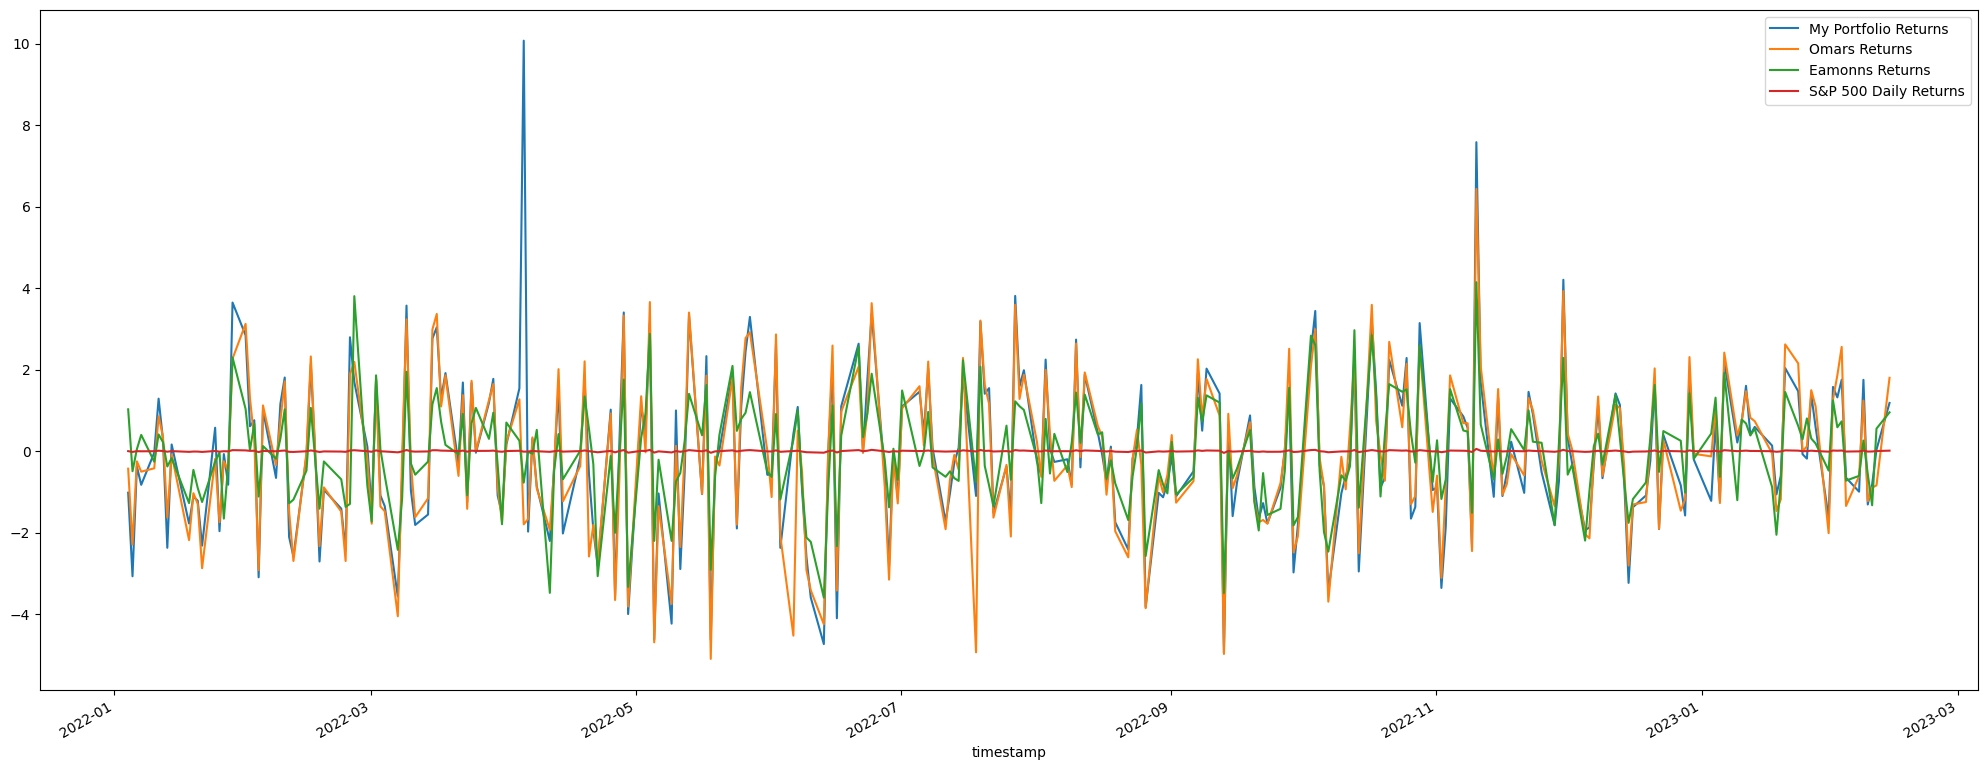

In [158]:
combined_df.plot(figsize=(25,10))

In [161]:
portfolio_std = pd.DataFrame(combined_df.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,1.949608
Omars Returns,1.869067
Eamonns Returns,1.251431
S&P 500 Daily Returns,0.014885
